<a href="https://colab.research.google.com/github/Alaqeelbasil/traffic-analysis/blob/main/weekly_practice_for_Time_Series_Forecasting_Practical_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [ ]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
traffic-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  traffic-dataset.zip
replace Traffic Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Traffic Data.csv')

In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"'{column}': {unique_values}\n")

'traffic_volume': [1209. 1248. 4602. ... 6742. 1783. 1132.]

'temp': [291.15 286.01 293.69 ... 249.88 269.23 289.06]

'rain_1h': [ 0.    0.25  1.78  2.79  0.44  2.26  0.28  1.86  1.02  4.    0.89  9.62
  5.08  1.15  3.05  3.45  2.85  4.79  1.82  5.42  1.85  5.19  2.62  1.52
  0.85  0.38  0.76  1.27  2.54 10.6   0.51  2.86  0.34  2.29  1.01  2.03
  2.16  1.1   3.1   3.94  5.84  0.69  1.14  1.4   1.66  1.68  3.4   2.48
  0.93  1.06  4.15  2.2   2.41  2.76  0.86  0.8   1.6   0.42  0.71  4.06
  0.61  0.81  0.43  0.98  1.72  1.21  7.11  0.3   2.88  0.29  0.32  2.61
  1.3   5.12  0.63  1.45  5.62  0.35  0.64  3.18  2.92  2.6   2.96  4.74
  1.65  3.3   0.66]

'snow_1h': [0.]

'clouds_all': [90  1 75  5 40 20  0  8 88 68 92 44 48 32 12 36 80 24 64 76 56]

'weather_main': ['Mist' 'Clear' 'Clouds' 'Rain' 'Thunderstorm' 'Fog' 'Drizzle' 'Snow'
 'Haze' 'Smoke']

'weather_description': ['mist' 'sky is clear' 'broken clouds' 'moderate rain'
 'proximity shower rain' 'proximity thunderstorm' 'fog' 'lig

In [ ]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [ ]:
df.set_index('date_time', inplace=True)
df.sort_index(inplace=True)

In [ ]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Mist,mist
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist


In [ ]:
df.shape

(20000, 7)

In [ ]:
df.isna().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [ ]:
df.drop('traffic_volume', axis=1, inplace=True)

In [ ]:
df.drop('weather_main', axis=1, inplace=True)
df.drop('weather_description', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2016-11-18 15:00:00 to 2018-09-30 23:00:00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        20000 non-null  float64
 1   rain_1h     20000 non-null  float64
 2   snow_1h     20000 non-null  float64
 3   clouds_all  20000 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 781.2 KB


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

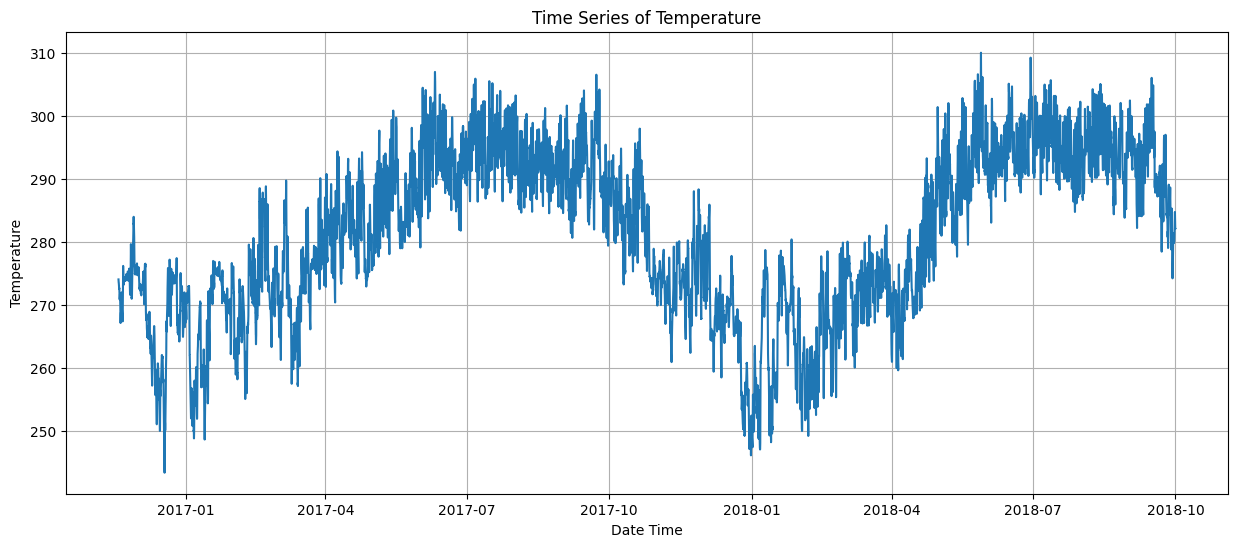

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['temp'])
plt.xlabel('Date Time')
plt.ylabel('Temperature')
plt.title('Time Series of Temperature')
plt.grid(True)
plt.show()


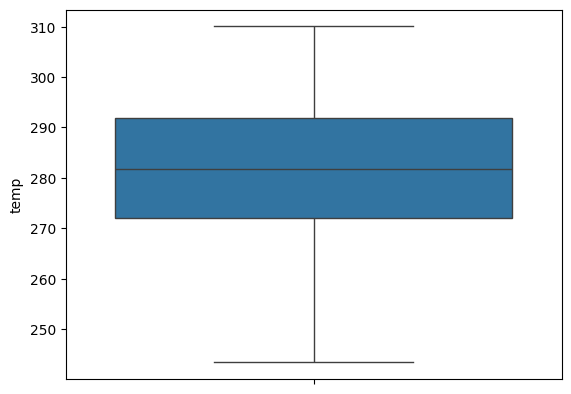

In [ ]:
 sns.boxplot(data=df['temp'])
 plt.xticks(rotation=90)
 plt.show() #no outliers

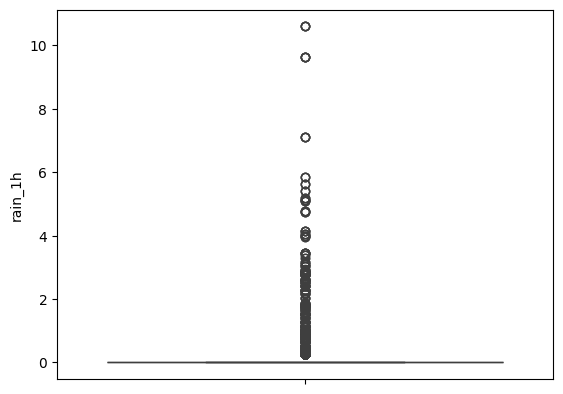

In [ ]:
 sns.boxplot(data=df['rain_1h'])
 plt.xticks(rotation=90)
 plt.show()
 # as we see there outliers that I have to deal with

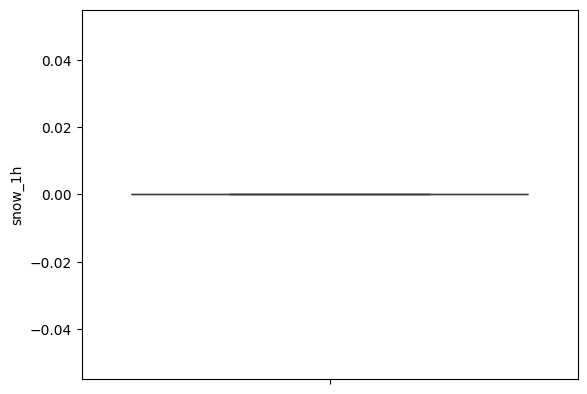

In [ ]:
 sns.boxplot(data=df['snow_1h'])
 plt.xticks(rotation=90)
 plt.show() #no outliers

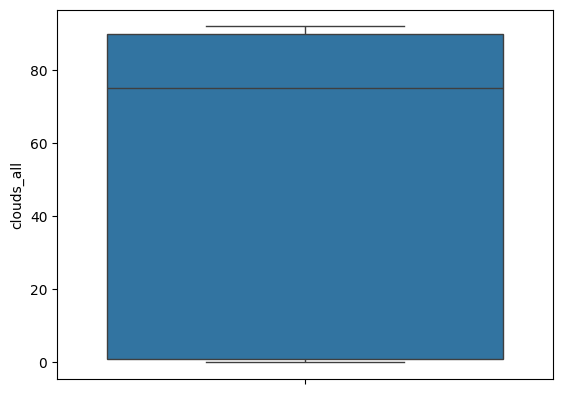

In [ ]:
sns.boxplot(data=df['clouds_all'])
plt.xticks(rotation=90)
plt.show()#no outliers

In [ ]:
# solving the outliers problem with IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

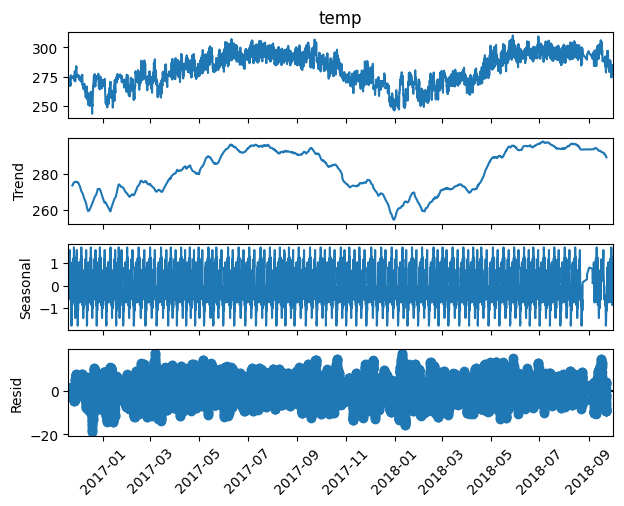

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['temp'], model='additive', period=365)
result.plot()
plt.xticks(rotation=45)
plt.show()

In [ ]:
# in 2018 the temp was the lowest and went up after that

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [ ]:
df['prev_traffic_volume'] = df['temp'].shift(1)
df.head()

,temp,rain_1h,snow_1h,clouds_all,prev_traffic_volume
date_time,,,,,
2016-11-18 15:00:00,274.08,0.0,0.0,90,NaN
2016-11-18 15:00:00,274.08,0.0,0.0,90,274.08
2016-11-18 15:00:00,274.08,0.0,0.0,90,274.08
2016-11-18 16:00:00,273.84,0.0,0.0,90,274.08
2016-11-18 16:00:00,273.84,0.0,0.0,90,273.84


In [ ]:
df['traffic_volume_diff'] = df['temp'].diff()

In [ ]:
df['DayOfWeek'] = df.index.dayofweek
df['Month'] = df.index.month
df['DayOfYear'] = df.index.dayofyear

## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [ ]:
from sklearn.model_selection import train_test_split
split_index = int(len(df) * 0.7)
train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]

In [ ]:
df = df.dropna(subset=['traffic_volume_diff','prev_traffic_volume'])

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# we scale the data after spliting
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [ ]:
df.isna().sum()

,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
prev_traffic_volume,0
traffic_volume_diff,0
DayOfWeek,0
Month,0
DayOfYear,0


In [ ]:
#import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
# Reshape the data
train_X = train_data_scaled[:-1].reshape((train_data_scaled[:-1].shape[0], 1, train_data_scaled[:-1].shape[1]))
train_y = train_data_scaled[1:, 0]
test_X = test_data_scaled[:-1].reshape((test_data_scaled[:-1].shape[0], 1, test_data_scaled[:-1].shape[1]))
test_y = test_data_scaled[1:, 0]

In [ ]:
# I chose LSTM model for th first model
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mae', optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [ ]:
history = lstm_model.fit(train_X, train_y, epochs=10, batch_size=36, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/10
375/375 - 3s - 8ms/step - loss: 0.0742 - val_loss: 0.1859
Epoch 2/10
375/375 - 1s - 3ms/step - loss: 0.0344 - val_loss: 0.0966
Epoch 3/10
375/375 - 1s - 3ms/step - loss: 0.0235 - val_loss: 0.0639
Epoch 4/10
375/375 - 1s - 3ms/step - loss: 0.0169 - val_loss: 0.0370
Epoch 5/10
375/375 - 1s - 3ms/step - loss: 0.0147 - val_loss: 0.0289
Epoch 6/10
375/375 - 1s - 3ms/step - loss: 0.0118 - val_loss: 0.0133
Epoch 7/10
375/375 - 2s - 4ms/step - loss: 0.0110 - val_loss: 0.0102
Epoch 8/10
375/375 - 2s - 5ms/step - loss: 0.0093 - val_loss: 0.0103
Epoch 9/10
375/375 - 1s - 3ms/step - loss: 0.0090 - val_loss: 0.0129
Epoch 10/10
375/375 - 1s - 3ms/step - loss: 0.0088 - val_loss: 0.0095


### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [ ]:
yhat = lstm_model.predict(test_X)

181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error # adding the libraries for rmse, mae

In [ ]:
# flatten the values to 1D shape
yhat = yhat.flatten()
test_y = test_y.flatten()
# calculate rmse and mae for the model
rmse = np.sqrt(mean_squared_error(test_y, yhat))
mae = mean_absolute_error(test_y, yhat)

In [ ]:
# printing the result of it
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

Test RMSE: 0.019
Test MAE: 0.015


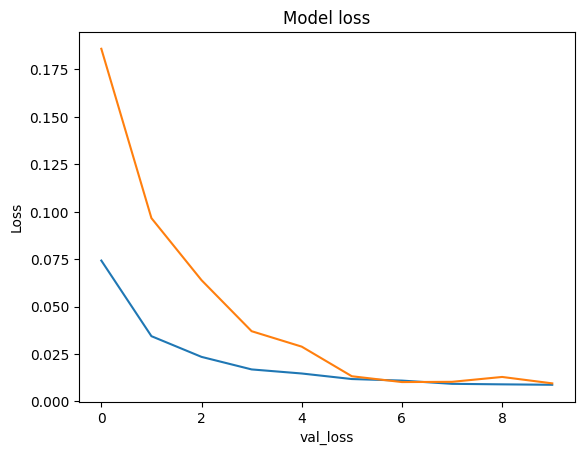

In [ ]:
# Plotting training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('val_loss')
plt.show()


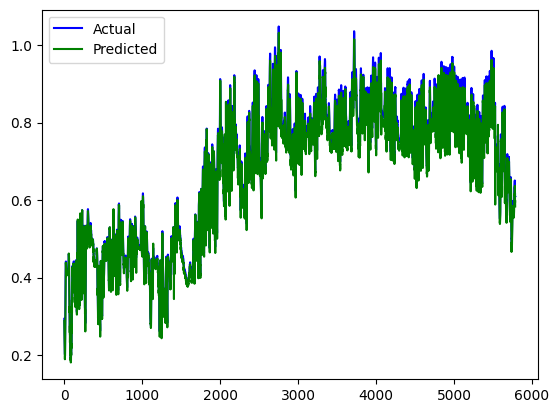

In [ ]:
# plotting predicted vs actual
plt.plot(test_y,color = 'blue',label='Actual')
plt.plot(yhat,color = 'green', label='Predicted')
plt.legend()
plt.show()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [ ]:
# I chose GRU model for as a second model
from tensorflow.keras.layers import GRU

In [ ]:
# buliding the model
gru_model = Sequential()
gru_model.add(GRU(50, input_shape=(train_X.shape[1], train_X.shape[2])))
gru_model.add(Dense(1))
gru_model.compile(loss='mae', optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history_gru = gru_model.fit(train_X, train_y, epochs=20, batch_size=36, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/20
375/375 - 4s - 9ms/step - loss: 0.0693 - val_loss: 0.1485
Epoch 2/20
375/375 - 2s - 6ms/step - loss: 0.0292 - val_loss: 0.0766
Epoch 3/20
375/375 - 1s - 3ms/step - loss: 0.0188 - val_loss: 0.0405
Epoch 4/20
375/375 - 1s - 3ms/step - loss: 0.0125 - val_loss: 0.0235
Epoch 5/20
375/375 - 1s - 3ms/step - loss: 0.0111 - val_loss: 0.0293
Epoch 6/20
375/375 - 2s - 4ms/step - loss: 0.0109 - val_loss: 0.0113
Epoch 7/20
375/375 - 2s - 6ms/step - loss: 0.0089 - val_loss: 0.0109
Epoch 8/20
375/375 - 2s - 6ms/step - loss: 0.0099 - val_loss: 0.0224
Epoch 9/20
375/375 - 1s - 3ms/step - loss: 0.0100 - val_loss: 0.0088
Epoch 10/20
375/375 - 1s - 3ms/step - loss: 0.0086 - val_loss: 0.0092
Epoch 11/20
375/375 - 1s - 4ms/step - loss: 0.0090 - val_loss: 0.0089
Epoch 12/20
375/375 - 1s - 3ms/step - loss: 0.0091 - val_loss: 0.0165
Epoch 13/20
375/375 - 1s - 3ms/step - loss: 0.0096 - val_loss: 0.0088
Epoch 14/20
375/375 - 2s - 5ms/step - loss: 0.0085 - val_loss: 0.0113
Epoch 15/20
375/375 - 2s - 5m

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [ ]:
yhat_gru = gru_model.predict(test_X)

181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


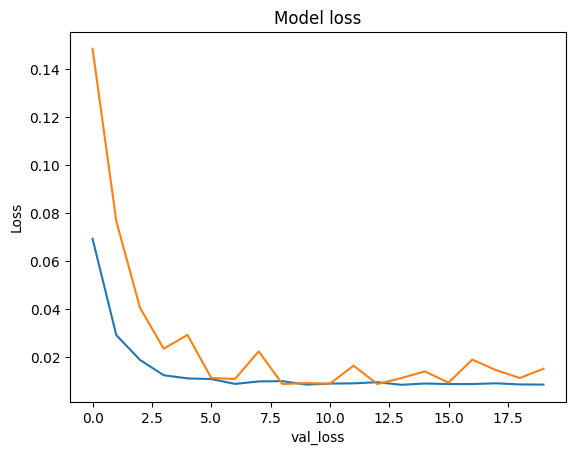

In [ ]:
plt.plot(history_gru.history['loss'])
plt.plot(history_gru.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('val_loss')
plt.show()

### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [ ]:
# flatten the values to 1D shape
yhat = yhat_gru.flatten()
test_y = test_y.flatten()
# calculate rmse and mae for the model
rmse = np.sqrt(mean_squared_error(test_y, yhat))
mae = mean_absolute_error(test_y, yhat)

In [ ]:
# printing the result of it
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

Test RMSE: 0.019
Test MAE: 0.015


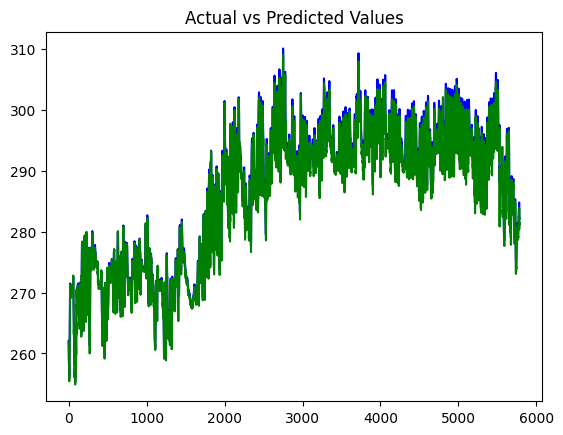

In [ ]:
plt.plot(inv_y, color='blue', label='Actual')
plt.plot(inv_yhat_gru, color='green', label='Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model? **I choose  to handle outliers and dor handling missing values i used drop because its only 3 rows**
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.**by adding prev_traffic_volume i can predect depending on the preivious hour , traffic_volume_diff to show diff between temps**
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting? **I tried multiple od them and choose what I saw bes**t
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting? The all show good result for models but i choose two
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: